In [67]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import simps

from scipy import interpolate

from time import time

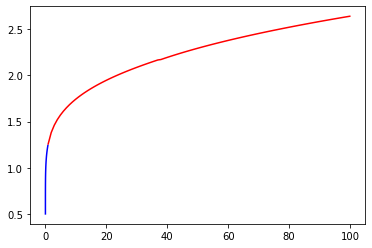

In [208]:
# Modified from http://nuclear.unh.edu/~ryan/Doc/He4Vapor.py

def T90(pressure):
    '''
    http://www.nist.gov/srd/upload/jpcrd551.pdf
    Page 1267
    '''
    # model parameters
    a_90_1 = np.array([1.392408,0.527153,0.166756,0.050988,0.026514,0.001975,-0.017976,0.005409,0.013259,0.0])
    a_90_2 = np.array([3.146631,1.357655,0.413923,0.091159,0.016349,0.001826,-0.004325,0.004973,0.0,0.0])
    B1 = 5.6
    C1 = 2.9
    B2 = 10.3
    C2 = 1.9
    
    #Input pressure is in Torr
    if isinstance(pressure, float) or isinstance(pressure, int):
        pressure = np.array([pressure])
    elif isinstance(pressure, list):
        pressure = np.array(pressure)
    
    torr2Pa = 133.322 #Convert factor from Torr to Pa
    p0,p1,p2 = 0.8626, 37.82, 1471 # in torr
    
    i = np.arange(0,10,1)
    
    temp = np.where((pressure >= p0) & (pressure <= p1), np.sum( a_90_1*((np.log(pressure[:,None]*torr2Pa)-B1)/C1)**i, axis=1), \
                   np.where((pressure > p1) & (pressure <= p2), np.sum( a_90_2*((np.log(pressure[:,None]*torr2Pa)-B2)/C2)**i, axis=1), 0))

    return temp

def P90_1(temp):
    log_p = 12.2440 - 59.83/(8.314510*temp) + (5.0/2.0)*np.log(temp)
    pressure = np.exp(log_p) 
    pressure = pressure/10.0 #Not sure why there is a divide by 10 here...
    pressure = pressure/133.322 #Convert Pa to Torr
    return pressure


def P90(temp):
	log_p = 12.2440 - 59.83/(8.314510*float(temp)) + (5.0/2.0)*math.log(float(temp))
	pressure = math.exp(log_p) 
	pressure = pressure/10.0 #Not sure why there is a divide by 10 here...
	pressure = pressure/133.322 #Convert Pa to Torr
	return pressure


pressure = np.arange(0.9,100,1)
temp = np.arange(0.5,1.25,0.01)

plt.plot(pressure,T90(pressure), 'r')
plt.plot(P90_1(temp), temp, 'b')

plt.show()

In [217]:

'''
He4 Vapor Pressure to temperature: Emperical formula
http://journals.aps.org/pr/pdf/10.1103/PhysRev.100.743
'''

def He4Pressure(temp):
    '''
    Return He4 Vapor pressure at temp in torr
    '''
    
    I = 4.6202
    A = 6.399
    B = 2.541
    C = 0.00612
    D = 0.5197
    alpha = 7.00
    beta  = 14.14
    
    log_p = I - (A/temp)+B*np.log(temp)+(C/2.0)*temp**2 
    log_p = log_p - D*((alpha*beta)/(np.power(beta,2)+1) - temp**-1)*np.arctan(alpha*temp-beta) 
    log_p = log_p - (alpha*D)/(2*(beta**2+1))*np.log((temp**2)/(1+(alpha*temp-beta)*(alpha*temp-beta)))
    return np.exp(log_p)



T0 = np.arange(2.0, 5., 0.01)
P0 = He4Pressure(T0)
He4Temp = interpolate.interp1d(P0, T0)

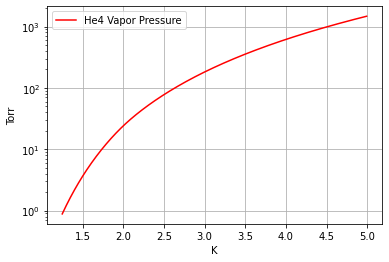

In [218]:
savepic =0

T = np.arange(1.25, 5., 0.01)
P = He4Pressure(T)

atm = 750
dp  = 40


plt.plot(T, P, 'r', label = "He4 Vapor Pressure")

# plt.axhline(y=atm, ls='--', label='1 atm')
# plt.axhline(y=atm+dp, c='g', ls='--', label='1 atm + 40 torr')

plt.yscale('log')

plt.xlabel('K')
plt.ylabel('Torr')

plt.legend()

plt.grid()

if savepic:
    plt.savefig('he4_VP.png', dpi=120)
plt.show()

In [221]:
He4Pressure(3.5)/He4Pressure(4.25)

0.45172390765881654